In [1]:
#Guerry 데이터 셋
#1830년도 프랑스의 사회인구학적 데이터
#Literacy : 문해율
#Crime_prop : 재산범좌당 인구
#Wealth : 재산세 순위
#Distance : 수도 파리까지의 거리(Km)
#url = https://vincentarelbundock.github.io/Rdatasets/csv/HistData/Guerry.csv

In [2]:
import pandas as pd
df = pd.read_csv('/Users/soojungchoi/pythonProject/pythonBasic/data/Guerry.csv')
df.head()

,Unnamed: 0,dept,Region,Department,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,...,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
0,1,1,E,Ain,28870,15890,37,5098,33120,35039,...,71,60,69,41,55,46,13,218.372,5762,346.03
1,2,2,N,Aisne,26226,5521,51,8901,14572,12831,...,4,82,36,38,82,24,327,65.945,7369,513.00
2,3,3,C,Allier,26747,7925,13,10973,17044,114121,...,46,42,76,66,16,85,34,161.927,7340,298.26
3,4,4,E,Basses-Alpes,12935,7289,46,2733,23018,14238,...,70,12,37,80,32,29,2,351.399,6925,155.90
4,5,5,E,Hautes-Alpes,17488,8174,69,6962,23076,16171,...,22,23,64,79,35,7,1,320.280,5549,129.10


<AxesSubplot:>

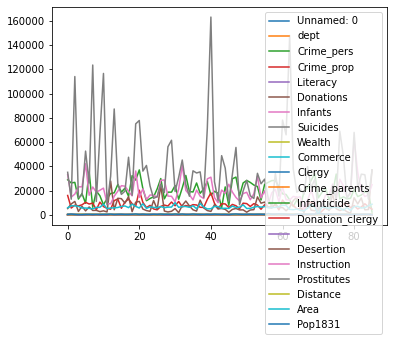

In [3]:
%matplotlib inline
df.plot()

In [4]:
df.isnull().sum()

Unnamed: 0         0
dept               0
Region             1
Department         0
Crime_pers         0
Crime_prop         0
Literacy           0
Donations          0
Infants            0
Suicides           0
MainCity           0
Wealth             0
Commerce           0
Clergy             0
Crime_parents      0
Infanticide        0
Donation_clergy    0
Lottery            0
Desertion          0
Instruction        0
Prostitutes        0
Distance           0
Area               0
Pop1831            0
dtype: int64

In [5]:
df.shape

(86, 24)

In [6]:
#결측값 1개 제거, inplace = True 실행 후 결과값을 현재 변수에 다시 저장
df.dropna(inplace=True)
df.shape

(85, 24)

In [7]:
df.isnull().sum()

Unnamed: 0         0
dept               0
Region             0
Department         0
Crime_pers         0
Crime_prop         0
Literacy           0
Donations          0
Infants            0
Suicides           0
MainCity           0
Wealth             0
Commerce           0
Clergy             0
Crime_parents      0
Infanticide        0
Donation_clergy    0
Lottery            0
Desertion          0
Instruction        0
Prostitutes        0
Distance           0
Area               0
Pop1831            0
dtype: int64

In [8]:
#변수 4개만 선택
df2 = df[['Crime_prop', 'Literacy', 'Wealth', 'Distance']]

In [9]:
import statsmodels.formula.api as smf
#Ordinary Least Squareds(OLS) 방식
#잔차(Residual) : 실제값과 예측값의 차
#잔차 제곱의 합을 최소롤 하는 방식으로 회귀선을 그리는 방식
model = smf.ols(formula='Crime_prop ~ Literacy + Wealth + Distance', data=df2).fit() #..?
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Crime_prop   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     10.33
Date:                Tue, 29 Mar 2022   Prob (F-statistic):           7.89e-06
Time:                        09:17:24   Log-Likelihood:                -788.25
No. Observations:                  85   AIC:                             1584.
Df Residuals:                      81   BIC:                             1594.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7118.5554   1162.059      6.126      0.000    4806.423    9430.688
Literacy     -41.6264     17.664     -2.357      0.021     -76.773      -6.480
Wealth        43.4753     12.868      3.378      0.001      17.871      69.080
Distance       2.4385      3.158      0.772      0.442      -3.845       8.722
==============================================================================
Omnibus:                       26.539   Durbin-Watson:                   1.857
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.437
Skew:                           1.238   Prob(JB):                     1.36e-10
Kurtosis:                       5.587   Cond. No.                         954.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/opt/homebrew/anaconda3/envs/virt/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Literacy', ylabel='Crime_prop'>

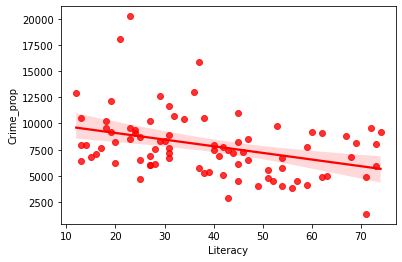

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

#문해율과 범죄율(음의 상관관계)
sns.regplot('Literacy', 'Crime_prop', df, color='red')

/opt/homebrew/anaconda3/envs/virt/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Wealth', ylabel='Crime_prop'>

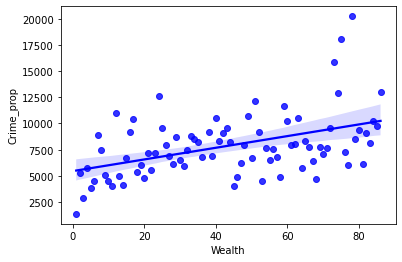

In [11]:
#재산세 순위와 범죄율
sns.regplot('Wealth', 'Crime_prop', df, color='blue')

/opt/homebrew/anaconda3/envs/virt/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Distance', ylabel='Crime_prop'>

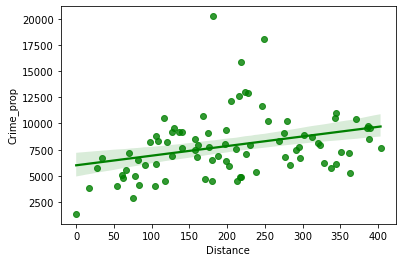

In [12]:
#수도와의 거리와 범죄율(수도와의 거리가 멀어질수록 범죄율이 높아진다)
sns.regplot('Distance','Crime_prop',df,color='green')

<AxesSubplot:xlabel='Wealth', ylabel='Crime_prop'>

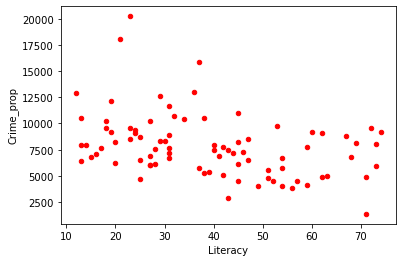

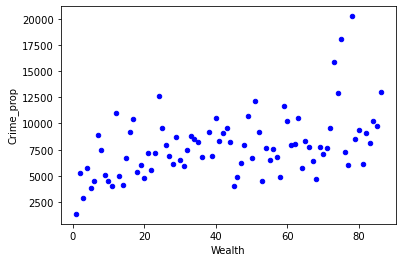

In [13]:
#산점도
df.plot('Literacy', 'Crime_prop', kind='scatter', color='red')
df.plot('Wealth', 'Crime_prop', kind='scatter',color='blue')

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = df[['Literacy', 'Wealth', 'Distance']]
y = df['Crime_prop']
model.fit(X,y)

LinearRegression()

In [20]:
#문해율 80, 재산세 순위 1, 수도까지의 거리 20일때의 범죄율
literacy = 80
wealth = 1
distance = 20

regionA = [literacy, wealth, distance]
crimeA = model.predict([regionA])

crimeA 
#sns.regplot('Distance', 'Crime_prop', df, color='green')
#3880명당 1건의 범죄

/opt/homebrew/anaconda3/envs/virt/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([3880.68993851])

In [18]:
#문해율 10, 재산세 순위 70, 수도까지의 거리 500일때의 범죄율
literacy = 10
wealth = 70
distance = 500

regionB = [literacy, wealth, distance]
crimeB = model.predict([regionB])

crimeB 
#10964명당 1건의 범죄

/opt/homebrew/anaconda3/envs/virt/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([10964.81313077])

In [21]:
#A, B 중간정도의 동네
#문해율 50, 재산세순위 30, 수도까지의 거리 300일 때의 범죄율
literacy = 50
wealth = 30
distance = 300

regionC = [literacy, wealth, distance]
crimeC = model.predict([regionC])

crimeC 
#7073명당 1건의 범죄

/opt/homebrew/anaconda3/envs/virt/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([7073.04508028])